In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as si
from tqdm.notebook import tqdm

In [2]:
def rhs(t, y, m, g):
    phi, phi_dot = y
    H = 1 / (2*t)
    return (
        phi_dot,
        - 3 * H * phi_dot - m**2 * phi - g * phi**3,
    )

In [3]:
def solve(params, initial, start=0.001, end=50.0):
    steps = np.geomspace(start, end, 300)
    steps[0] = start; steps[-1] = end
    return si.solve_ivp(rhs, (start, end), (initial, 0.0), t_eval=steps, args=params)

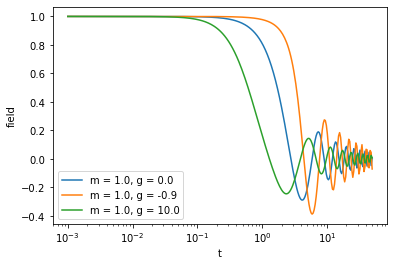

In [4]:
initial = 1.0
for params in [(1.0, 0.0), (1.0, -0.9), (1.0, +10.0)]:
    sol = solve(params, 1.0)
    plt.semilogx(sol.t, sol.y[0], label=f"m = {params[0]}, g = {params[1]}")    
plt.xlabel("t")
plt.ylabel("field")
plt.legend()

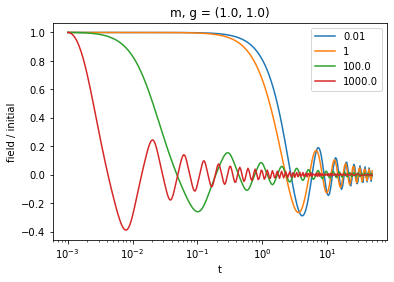

In [5]:
params = (1.0, 1.0)
for initial in [1e-2, 1, 1e2, 1e3]:
    sol = solve(params, initial)
    plt.semilogx(sol.t, sol.y[0] / initial, label=f"{initial}")    
plt.xlabel("t")
plt.ylabel("field / initial")
plt.title(f"m, g = {params}")
plt.legend()

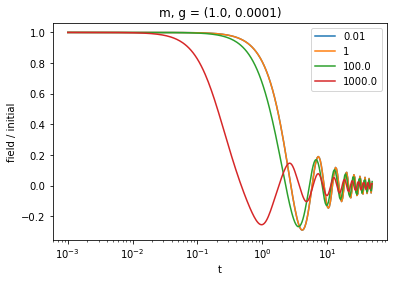

In [6]:
params = (1.0, 1e-4)
for initial in [1e-2, 1, 1e2, 1e3]:
    sol = solve(params, initial)
    plt.semilogx(sol.t, sol.y[0] / initial, label=f"{initial}")    
plt.xlabel("t")
plt.ylabel("field / initial")
plt.title(f"m, g = {params}")
plt.legend()

In [7]:
def first_zero_crossing(params, initial):
    sol = solve(params, initial)
    r = np.where(sol.y[0] < 0.0)[0]
    if len(r) != 0:
        return sol.t[r[0]]
    else:
        return np.nan

In [8]:
def analytical_osc(params, initial):
    m, g = params
    H_osc = max(m, np.sqrt(g) * initial) / 3
    t_osc = 1 / (2*H_osc)
    return t_osc

In [9]:
phi0_range = np.geomspace(1e-2, 1e3, 30) 
g_range = np.geomspace(1e-5, 1e4, 30)

In [23]:
t_osc = [[first_zero_crossing((1.0, g), phi0) for phi0 in phi0_range] for g in tqdm(g_range)]

In [39]:
t_osc_analytical = [[analytical_osc((1.0, g), phi0) for phi0 in phi0_range] for g in g_range]

Text(0, 0.5, 'g')

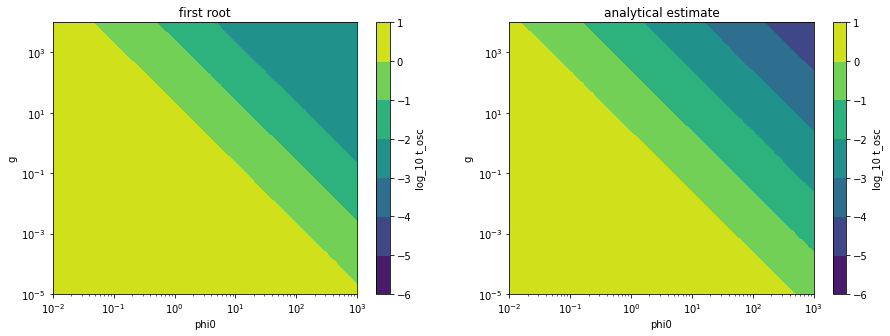

In [41]:
levels = np.arange(-6, 1 + 1, 1)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("first root")
plt.contourf(phi0_range, g_range, np.log10(t_osc), levels)
plt.xscale("log"); plt.yscale("log")
plt.colorbar().set_label("log_10 t_osc")
plt.xlabel("phi0")
plt.ylabel("g")
plt.subplot(1,2,2)
plt.title("analytical estimate")
plt.contourf(phi0_range, g_range, np.log10(t_osc_analytical), levels)
plt.xscale("log"); plt.yscale("log")
plt.colorbar().set_label("log_10 t_osc")
plt.xlabel("phi0")
plt.ylabel("g")

In [10]:
solve(())

<function __main__.solve(params, initial, start=0.001, end=50.0)>